## Question 1
### describe in detail the substantive problem you are interested in working on for this assignment

For this assignment, I chose to work with the Alzheimer MRI dataset from Kaggle. It is widely known that the most common cause of dementia is Alzheimer's Disease (2/3 of the population). Loss of brain funtion due to dementia negatively impacts memory, thinking, language, judgment and behavior. Alzheimer's is a grave disease that completely takes over and tarnishes your quality of life as you age. The diagnosis of Alzheimer's/dementia can be determined through cognitive ability testing and identifying certain symptoms. However, it can also be evaluated by performing brain imaging exams such as CT or MRI scans. From the brain scans, doctors can identify Alzheimer's by looking at the brain's ventricles and cortical atrophy. Additionally, in later stages, the MRIs may show a decrease in the size of different areas of the brain. 

Alzheimer's is not cureable; it is irreversable and progressive. Looking MRI scans to identify early stages of dementia can be used to predict which patients with mild cognitive impairment may eventually develop Alzheimer's disease. The earlier the presence of Alzheimer's can be detected/predicted, the earlier the patient can start on medications that slow the progression of the disease and manage the symptoms. 

The substantive problem I am interested in working on is how can we detect Alzheimer's in the early dementia stages so we can treat it before it is too late? The earlier we can detect the presence of Alzheimer's, the earlier can start treatment, thus the treatment will be more effective in slowing down the progression. Furthermore, patients that are diagnosed with Alzheimer's in the "moderate dementia" stage typically pass away within 3 years. Therefore, developing an algorithm that predicts early on-set dementia/Alzheimers can increase life expactancy as well as increase life quality overall. 


Sources:
https://www.radiologyinfo.org/en/info/alzheimers


## Question 2
describe your data (including the features, target, and the general type of data you are working with)


The data I am using for this project was retrieved from Kaggle (https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset). The images are collected from several websites/hospitals/public repositories. The dataset includes a total of 6,400 128 x 128 greyscale MRI images that visualize four categories of dementia. 

* Class - 1: Mild Demented (896 images) 
* Class - 2: Moderate Demented (64 images) 
* Class - 3: Non Demented (3200 images) 
* Class - 4: Very Mild Demented (2240 images)

Non Demented MRI scans are used as a "control" group to compare to images of affected brains. 

During the very mild demented stage, cognitive impairment is difficult to detect through cognitive ability testing. At this stage, the magnitude of impairment is small, since it is just when the patient starts to forget trivial things such as where they placed an object or people's names. 

Cognitive testing can be found during the mild demented stage, since this is where the impact is more significant. Patients often forget more important things like words and directions. Additionally, they may begin to lose their ability to work and focus. 

In the Moderate Demented class, I assume all the severe stages of dementia, including the terminal stage, are merged into this category. During moderate dementia, patients experience sever symptoms such as  inability to recognize family members or understand language. 

The preprocessed greyscale images are  128 x 128 (height and width) with 1 channel. The number of features is the number of pixels, which is 128 * 128 = 16,384.

For VGG16, VGG19, and ResNet50 (CNN variations), I changed the greyscale to RBG(colored images) so it meets the the requirement for input shape (128, 128, 3). The number of features in this case is 128 * 128 * 3 = 49,152.

The target is to define/classify what stages of alzheimer the image/patient is in. 





## Question 3
describe why you think Deep Learning systems would be a good methodological choice, and the specific architecture(s) you think appropriate to explore

As mentioned above in Question 1, building a model that can classify and predict Alzheimer's in the early stages is crucial for starting optimal treatment to increase life expectancy. It is difficult to identify symptoms of Alzheimer's through cognitive ability testing in the early dementia stage so utilizing MRI scans is beneficial for early recognition. 

Deep Learning systems (a subset of machine learning) are a good methodological choice for this project because they are able to ingest and process unstructured data, such as text and images. They are able to learn from large amounts of data, which is suitable for a dataset containing over 6,000 images. Deep learning models can automate feature extraction which eliminates human dependency. Deep learning algorithms are also able to adjust and fit itself for accuracy. Therefore, it is useful in the case of predicting a new (image) Alzheimer's MRI scan.  

I chose my architecture to be Convolutional Neural Networks because they are known to be good for image classification. It is a deep learning system because it is essentially a neural network that consists of three or more layers. The additional hidden layers can help to optimize and refine for accuracy as opposed to a single layer neural network. CNNS are fully connected in layers and are very effective in reducing the number of parameters without losing on the quality of models. 




## Data Set Up

### **Set up Environment**

In [ ]:
%matplotlib inline

In [ ]:
## import packages

import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

from skimage.transform import resize
from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3


In [ ]:
## mount drive and download data
## mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! unzip '/content/drive/My Drive/Advanced ML/Alzheimer'

Streaming output truncated to the last 5000 lines.
  inflating: Alzheimer/Non_Demented/non_1757.jpg  
  inflating: __MACOSX/Alzheimer/Non_Demented/._non_1757.jpg  
  inflating: Alzheimer/Non_Demented/non_3168.jpg  
  inflating: __MACOSX/Alzheimer/Non_Demented/._non_3168.jpg  
  inflating: Alzheimer/Non_Demented/non_2276.jpg  
  inflating: __MACOSX/Alzheimer/Non_Demented/._non_2276.jpg  
  inflating: Alzheimer/Non_Demented/non_1019.jpg  
  inflating: __MACOSX/Alzheimer/Non_Demented/._non_1019.jpg  
  inflating: Alzheimer/Non_Demented/non_683.jpg  
  inflating: __MACOSX/Alzheimer/Non_Demented/._non_683.jpg  
  inflating: Alzheimer/Non_Demented/non_2510.jpg  
  inflating: __MACOSX/Alzheimer/Non_Demented/._non_2510.jpg  
  inflating: Alzheimer/Non_Demented/non_2504.jpg  
  inflating: __MACOSX/Alzheimer/Non_Demented/._non_2504.jpg  
  inflating: Alzheimer/Non_Demented/non_697.jpg  
  inflating: __MACOSX/Alzheimer/Non_Demented/._non_697.jpg  
  inflating: Alzheimer/Non_Demented/non_2262.jpg 

In [ ]:
# Extracting all filenames iteratively
base_path = 'Alzheimer'
categories = ['Non_Demented', 'Very_Mild_Demented', 'Mild_Demented', 'Moderate_Demented']

# load file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)

print('number of images for each category:', [len(f) for f in fnames])
print(fnames[0:2]) #examples of file names

number of images for each category: [3200, 2240, 896, 64]
[['Alzheimer/Non_Demented/non_1489.jpg', 'Alzheimer/Non_Demented/non_1183.jpg', 'Alzheimer/Non_Demented/non_404.jpg', 'Alzheimer/Non_Demented/non_2348.jpg', 'Alzheimer/Non_Demented/non_529.jpg', 'Alzheimer/Non_Demented/non_1682.jpg', 'Alzheimer/Non_Demented/non_2273.jpg', 'Alzheimer/Non_Demented/non_1487.jpg', 'Alzheimer/Non_Demented/non_2193.jpg', 'Alzheimer/Non_Demented/non_373.jpg', 'Alzheimer/Non_Demented/non_2407.jpg', 'Alzheimer/Non_Demented/non_2256.jpg', 'Alzheimer/Non_Demented/non_94.jpg', 'Alzheimer/Non_Demented/non_881.jpg', 'Alzheimer/Non_Demented/non_1232.jpg', 'Alzheimer/Non_Demented/non_2907.jpg', 'Alzheimer/Non_Demented/non_213.jpg', 'Alzheimer/Non_Demented/non_2638.jpg', 'Alzheimer/Non_Demented/non_1599.jpg', 'Alzheimer/Non_Demented/non_1824.jpg', 'Alzheimer/Non_Demented/non_3182.jpg', 'Alzheimer/Non_Demented/non_2402.jpg', 'Alzheimer/Non_Demented/non_1188.jpg', 'Alzheimer/Non_Demented/non_2591.jpg', 'Alzheimer/

### **Preprocessor Function & Setup**

In [ ]:
def preprocessor(data, shape=(128, 128)):
        """
        This function reads in images, resizes them to a fixed shape, and
        min/max transforms them, before converting feature values to float32
        for ONNX.
        
        params:
            data
                list of unprocessed images
                      
        returns:
            X
                numpy array of preprocessed image data
                  
        """
           
        import cv2
        import numpy as np

        "Resize a color image and min/max transform the image"
        img = cv2.imread(data, cv2.IMREAD_GRAYSCALE) # Read in image from filepath.
        ## img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
        ## img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # cv2 reads in images in order of blue green and red, we reverse the order for ML.
        #grayscale image?  Use im_gray = cv2.imread('gray_image.png', cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, shape) # Change height and width of image.
        img = img / 255.0 # Min-max transform.  

        # Resize the images.
        X = np.array(img)
        #X = np.expand_dims(X, axis=0) # Expand dims to add "1" to object shape [1, h, w, channels] if needed.
        X = np.array(X, dtype=np.float32) # Final shape for onnx runtime.
        return X

In [ ]:
# Create list of file paths
image_filepaths=fnames[0]+fnames[1]+fnames[2]+fnames[3]

# Iteratively import and preprocess data using map function

# map functions apply your preprocessor function one step at a time to each filepath
preprocessed_image_data=list(map(preprocessor,image_filepaths ))

# Object needs to be an array rather than a list for Keras (map returns to list object)
X= np.array(preprocessed_image_data) # Assigning to X to highlight that this represents feature input data for our model

In [ ]:
len(image_filepaths)

6400

In [ ]:
print(len(X) ) #same number of elements as filenames
print(X.shape ) #dimensions now 128,128,1 for all images
print(X.min() ) #min value of every image is zero
print(X.max() ) #max value of every image is one


6400
(6400, 128, 128)
0.0
1.0


In [ ]:
# Create y data made up of correctly ordered labels from file folders
from itertools import repeat


print('number of images for each category:', [len(f) for f in fnames])
Non_Demented = list(repeat('Non_Demented', 3200))
Very_Mild_Demented = list(repeat('Very_Mild_Demented', 2240))
Mild_Demented = list(repeat('Mild_Demented', 896))
Moderate_Demented = list(repeat('Moderate_Demented', 64))

#combine into single list of y labels
y_labels = Non_Demented + Very_Mild_Demented + Mild_Demented + Moderate_Demented

#check length, same as X above
print(len(y_labels) )

# Need to one hot encode for Keras.  Let's use Pandas

import pandas as pd
y=pd.get_dummies(y_labels)

display(y)

number of images for each category: [3200, 2240, 896, 64]
6400


,Mild_Demented,Moderate_Demented,Non_Demented,Very_Mild_Demented
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
6395,0,1,0,0
6396,0,1,0,0
6397,0,1,0,0
6398,0,1,0,0


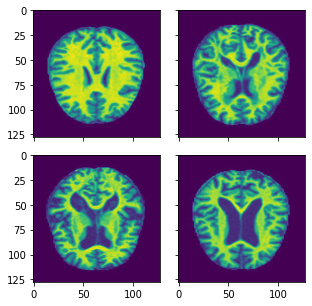

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import random

im1 =preprocessor('Alzheimer/Non_Demented/non_415.jpg')
im2 =preprocessor('Alzheimer/Very_Mild_Demented/verymild_1884.jpg')
im3 =preprocessor('Alzheimer/Mild_Demented/mild_562.jpg')
im4 =preprocessor('Alzheimer/Moderate_Demented/moderate_61.jpg')

fig = plt.figure(figsize=(5., 5.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(2, 2), 
                 axes_pad=0.25,
                 )

for ax, im in zip(grid, [im1, im2, im3, im4]):
    ax.imshow(im)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 1234)


y_test.sum()

Mild_Demented         179
Moderate_Demented      13
Non_Demented          640
Very_Mild_Demented    448
dtype: int64

## Question 4: Models
show the code and outputs of 3-5 different experiments with variants of your proposed architecture(s)

### Model: Convolutional Neural Network

In [ ]:
with tf.device('/device:GPU:0'):

  cnn_model = tf.keras.Sequential([    
    tf.keras.layers.Conv2D(kernel_size=3, filters=32, padding='same', activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=128, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    # classifying into 4 categories
    tf.keras.layers.Dense(4, activation='softmax')
  ])
  
  cnn_model.compile(
    optimizer="adam", 
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])
  
  cnn_model.fit(X_train, y_train, 
                    epochs = 3, verbose=1,validation_data=(X_test,y_test)) 

Epoch 1/3
160/160 [==============================] - 375s 2s/step - loss: 1.0455 - accuracy: 0.4859 - val_loss: 0.9768 - val_accuracy: 0.5711
Epoch 2/3
160/160 [==============================] - 357s 2s/step - loss: 0.9581 - accuracy: 0.5371 - val_loss: 0.8771 - val_accuracy: 0.5922
Epoch 3/3
160/160 [==============================] - 357s 2s/step - loss: 0.9246 - accuracy: 0.5580 - val_loss: 0.8351 - val_accuracy: 0.6195


Val Accuracy: 0.6195

In [ ]:
# using predict_classes() for multi-class data to return predicted class index.

def predict_classes(x): 
  proba=x
  if proba.shape[-1] > 1:
      return proba.argmax(axis=-1)
  else:
      return (proba > 0.5).astype("int32")

print(predict_classes(cnn_model.predict(X_test)))

prediction_index=predict_classes(cnn_model.predict(X_test))


# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Iterate through all predicted indices using map method
prediction_labels=list(map(lambda x: labels[x], prediction_index))

[3 2 3 ... 3 2 2]


In [ ]:
with tf.device('/device:GPU:0'): 

  model = tf.keras.Sequential([   
    tf.keras.layers.Conv2D(kernel_size=5, filters=32, padding='same', activation='relu', input_shape=(128, 128, 1)),
    tf.keras.layers.Conv2D(kernel_size=1, filters=32, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=5, filters=64, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=5, filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=128, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Conv2D(kernel_size=5, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=1, filters=512, padding='same', activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='softmax')
  ])

  model.compile(
    optimizer="rmsprop", ## using rmsprop optimizer
    loss= 'categorical_crossentropy',
    metrics=['accuracy'])
  
  # Fitting the CNN to the Training set
  model.fit(X_train, y_train, 
                    epochs = 1, verbose=1,validation_data=(X_test,y_test))

160/160 [==============================] - 752s 5s/step - loss: 1.1588 - accuracy: 0.4834 - val_loss: 1.0612 - val_accuracy: 0.5000


Val Accuracy:0.500

### Preprocessor for VGG & ResNet50
convert images so they have 3 channels for VGG19, VGG16, and ResNet50

In [ ]:
## preprocess for VGG 
def preprocessor2(data, shape=(128, 128)):
        """
        This function reads in images, resizes them to a fixed shape, and
        min/max transforms them, before converting feature values to float32
        for ONNX.
        
        params:
            data
                list of unprocessed images
                      
        returns:
            X
                numpy array of preprocessed image data
                  
        """
           
        import cv2
        import numpy as np

        "Resize a color image and min/max transform the image"
        img2 = cv2.imread(data) # Read in image from filepath.
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) ## cv2.COLOR_GRAY2RGB
        img2 = cv2.resize(img2, shape) # Change height and width of image.
        img2 = img2 / 255.0 # Min-max transform.  

        # Resize the images.
        X2 = np.array(img2)
        #X = np.expand_dims(X, axis=0) # Expand dims to add "1" to object shape [1, h, w, channels] if needed.
        X2 = np.array(X2, dtype=np.float32) # Final shape for onnx runtime.
        return X2

In [ ]:
# Create list of file paths
image_filepaths2= fnames[0]+fnames[1]+fnames[2]+fnames[3]

# Iteratively import and preprocess data using map function

# map functions apply your preprocessor function one step at a time to each filepath
preprocessed_image_data2 = list(map(preprocessor2,image_filepaths2))

# Object needs to be an array rather than a list for Keras (map returns to list object)
X2 = np.array(preprocessed_image_data2) # Assigning to X to highlight that this represents feature input data for our model

In [ ]:
print(len(X2) ) #same number of elements as filenames
print(X2.shape ) #dimensions now 128,128,3 for all images
print(X2.min() ) #min value of every image is zero
print(X2.max() ) #max value of every image is one

6400
(6400, 128, 128, 3)
0.0
1.0


In [ ]:
# Create y data made up of correctly ordered labels from file folders
from itertools import repeat

print('number of images for each category:', [len(f) for f in fnames])
Non_Demented = list(repeat('Non_Demented', 3200))
Very_Mild_Demented = list(repeat('Very_Mild_Demented', 2240))
Mild_Demented = list(repeat('Mild_Demented', 896))
Moderate_Demented = list(repeat('Moderate_Demented', 64))

#combine into single list of y labels
y2_labels = Non_Demented + Very_Mild_Demented + Mild_Demented + Moderate_Demented

#check length, same as X above
print(len(y2_labels) )

# Need to one hot encode for Keras.  Let's use Pandas

import pandas as pd
y2= pd.get_dummies(y2_labels)

display(y2)

number of images for each category: [3200, 2240, 896, 64]
6400


,Mild_Demented,Moderate_Demented,Non_Demented,Very_Mild_Demented
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
6395,0,1,0,0
6396,0,1,0,0
6397,0,1,0,0
6398,0,1,0,0


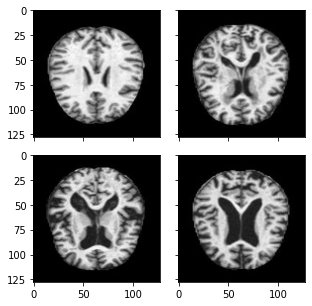

In [ ]:
im5 =preprocessor2('Alzheimer/Non_Demented/non_415.jpg')
im6 =preprocessor2('Alzheimer/Very_Mild_Demented/verymild_1884.jpg')
im7 =preprocessor2('Alzheimer/Mild_Demented/mild_562.jpg')
im8 =preprocessor2('Alzheimer/Moderate_Demented/moderate_61.jpg')

fig = plt.figure(figsize=(5., 5.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(2, 2), 
                 axes_pad=0.25,
                 )

for ax, im in zip(grid, [im5, im6, im7, im8]):
    ax.imshow(im)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, stratify = y2, test_size = 0.20, random_state = 1234)


y2_test.sum()

Mild_Demented         179
Moderate_Demented      13
Non_Demented          640
Very_Mild_Demented    448
dtype: int64

### VGG19

In [ ]:
with tf.device('/device:GPU:0'): 
                                 
        vgg19_model = Sequential()
        vgg19_model.add(Conv2D(filters = 96, kernel_size = (11,11), strides = (4,4), padding = 'same', activation='relu', input_shape=[128, 128, 3]))
        vgg19_model.add(BatchNormalization())
        vgg19_model.add(MaxPooling2D(pool_size= (3,3), strides = (2,2)))
        vgg19_model.add(Conv2D(filters= 256, kernel_size= (5,5), strides = (1,1), padding='same', activation='relu'))
        vgg19_model.add(BatchNormalization())
        vgg19_model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
        vgg19_model.add(Conv2D(filters= 384, kernel_size= (3,3), strides = (1,1), padding='same', activation='relu'))
        vgg19_model.add(BatchNormalization())
        vgg19_model.add(Conv2D(filters= 384, kernel_size= (3,3), strides = (1,1), padding='same', activation='relu'))
        vgg19_model.add(BatchNormalization())
        vgg19_model.add(Conv2D(filters= 256, kernel_size= (3,3), strides = (1,1), padding='same', activation='relu'))
        vgg19_model.add(BatchNormalization())
        vgg19_model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
        vgg19_model.add(Flatten())
        vgg19_model.add(Dense(124, activation='relu'))
        vgg19_model.add(Dropout(0.5))
        vgg19_model.add(Dense(124, activation='relu'))
        vgg19_model.add(Dropout(0.5))
        vgg19_model.add(Dense(4, activation='softmax'))

        # Compile model...
        vgg19_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

        # Fitting the NN to the Training set...
        vgg19_model.fit(X2_train, y2_train,
                        epochs=1, verbose=1, validation_data=(X2_test, y2_test))

160/160 [==============================] - 249s 2s/step - loss: 1.5731 - accuracy: 0.4670 - val_loss: 8.7855 - val_accuracy: 0.5000


### VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
from tensorflow.keras import backend as K

vgg16_model = VGG16(input_shape=(128,128,3),
                                               include_top=False, 
                                               weights='imagenet') 

In [ ]:
IMG_SHAPE = (128, 128, 3)
conv_base = InceptionV3(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
freeze_layers_after=10
for layer in conv_base.layers[freeze_layers_after:]:
  layer.trainable =  False

with tf.device('/device:GPU:0'): 

      vgg16_model = Sequential()
      vgg16_model.add(conv_base)
      vgg16_model.add(GlobalAveragePooling2D())
      vgg16_model.add(Dense(120, activation='relu'))
      vgg16_model.add(Dropout(0.2))
      vgg16_model.add(Dense(60, activation='relu'))
      vgg16_model.add(Dense(30, activation='relu'))
      vgg16_model.add(Flatten())
      vgg16_model.add(Dense(4, activation='softmax')) 

      vgg16_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) 
      vgg16_model.fit(X2_train, y2_train,
          epochs = 3 , verbose=1,validation_data=(X2_test,y2_test))

Epoch 1/3
160/160 [==============================] - 753s 5s/step - loss: 1.0121 - acc: 0.5270 - val_loss: 0.9430 - val_acc: 0.5672
Epoch 2/3
160/160 [==============================] - 747s 5s/step - loss: 0.8767 - acc: 0.5752 - val_loss: 0.9535 - val_acc: 0.5273
Epoch 3/3
160/160 [==============================] - 728s 5s/step - loss: 0.8490 - acc: 0.5891 - val_loss: 0.8575 - val_acc: 0.5875


Val Accuracy: .5875

### ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten

IMG_SHAPE = (128, 128, 3)

resnet_model = ResNet50(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

resnet_model.trainable = False

gap1 = GlobalAveragePooling2D()(resnet_model.layers[-1].output)
output = Dense(4, activation='softmax')(gap1)

resnet = Model(inputs=resnet_model.inputs, outputs=output)

In [ ]:
with tf.device('/device:GPU:0'):

  model_resnet = Sequential()
  model_resnet.add(resnet)
  model_resnet.add(Dense(512, activation='relu', input_dim= IMG_SHAPE))
  model_resnet.add(Dropout(0.3))
  model_resnet.add(Dense(512, activation='relu'))
  model_resnet.add(Dropout(0.3))
  model_resnet.add(Dense(4, activation='sigmoid'))

  model_resnet.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc']) 

  model_resnet.fit(X2_train, y2_train,
          epochs = 1, verbose=1,validation_data=(X2_test, y2_test))


160/160 [==============================] - 334s 2s/step - loss: 1.2073 - acc: 0.4900 - val_loss: 1.1062 - val_acc: 0.5000


In [ ]:
with tf.device('/device:GPU:0'):

  model_resnet = Sequential()
  model_resnet.add(resnet)
  model_resnet.add(Dense(512, activation='relu', input_dim = IMG_SHAPE))
  model_resnet.add(Dropout(0.3))
  model_resnet.add(Dense(512, activation='relu'))
  model_resnet.add(Dropout(0.3))
  model_resnet.add(Dense(4, activation='sigmoid'))
  
  model_resnet.compile(loss='binary_crossentropy',
              optimizer= 'rmsprop',
              metrics=['acc'])
  
  model_resnet.fit(X2_train, y2_train,
          epochs = 1, verbose=1,validation_data=(X2_test, y2_test))

160/160 [==============================] - 334s 2s/step - loss: 0.4590 - acc: 0.4928 - val_loss: 0.4534 - val_acc: 0.5000


Val Accuracy: 0.500

## Question 5 
select the model that best fits the problem you are trying to solve and discuss why it fulfills this purpose

The two models with the highest validation accuracy score is the Convolutional Neural Network (0.6195) and the VGG16 model (0.5875). For both of these models, I increased the number of epochs to 3 to improve the accuracy. However, I believe the CNN works best because traditionally, VGG16 are not meant to work well with greyscale images. Therefore, I attribute the lower validation accuracy score to the transformation of the the data that might have affected the performance of VGG16.

The problem I am trying to solve is to classify and predict the different stages of Alzheimer's to be able to improve treatment early on for patients. CNNs fulfill this purpose of image classification because it performs automated feature extractions from the inputted images. Each layer of a CNN has multiple convolutional filters, sliding windows of a smaller size than the input matrix, that scan the complete feature matrix and carry out the dimensionality reduction. Dimensionality reduction is suitable for the large amounts of parameters within an image, making CNNs very effective for image classification. 

NOTE: The models in general produce a low score, which I could've improved by resizing the images to be larger than 128 x 128. However, when I attempted to increase the sizing, the Colab was unable to run the models as the RAM would constantly crash. In addition, I tried other ways to improve the model, such as increase epoch or network depth with more layers, but my RAM would constantly crash or disconnect. 
